In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\Users\Shamik Shetty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Shamik Shetty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Shamik Shetty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
df_laptop=pd.read_csv("laptops.csv", index_col=0)
df_laptop.head()

,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


In [3]:
df_laptop.shape

(920, 10)

In [4]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        920 non-null    object
 1   price        920 non-null    object
 2   discount     831 non-null    object
 3   Processor    920 non-null    object
 4   RAM          920 non-null    object
 5   OS           920 non-null    object
 6   SSD          920 non-null    object
 7   Display      920 non-null    object
 8   In_build_sw  357 non-null    object
 9   warranty     906 non-null    object
dtypes: object(10)
memory usage: 79.1+ KB


In [5]:
df_laptop.describe()

,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
count,920,920,831,920,920,920,920,920,357,906
unique,846,469,763,92,57,45,52,88,118,117
top,Infinix X1 Slim Series Core i5 10th Gen - (8 G...,"₹54,990","₹74,99026% off",Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty
freq,4,17,4,95,357,436,496,253,42,456


In [6]:
df_laptop.isnull().sum()

title            0
price            0
discount        89
Processor        0
RAM              0
OS               0
SSD              0
Display          0
In_build_sw    563
warranty        14
dtype: int64

In [7]:
# Collect laptop brand
df_laptop['make'] = df_laptop['title'].str.split(' ').str[0]
df_laptop.make.value_counts()

ASUS         263
HP           165
DELL         162
Lenovo       108
acer          62
MSI           50
APPLE         44
Infinix       31
SAMSUNG        8
GIGABYTE       7
realme         4
ALIENWARE      4
Avita          4
RedmiBook      2
LG             2
Nokia          1
Vaio           1
Mi             1
Ultimus        1
Name: make, dtype: int64

In [8]:
# Notice that dell has weird strings in it compared to the rest of the brands
df_laptop[df_laptop.make == "DELL"]['Processor']

0      Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...
27     Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
30     Processor: Intel i5-1235U (Base- 3.30 GHz & Tu...
55     Processor: Intel i5-1235U (Base- 3.30 GHz & Tu...
73                    Intel Core i3 Processor (10th Gen)
                             ...                        
905                   Intel Core i5 Processor (11th Gen)
906    Processor: AMD Athlon Silver 3050U (2.30 GHz u...
910                   Intel Core i3 Processor (11th Gen)
916    Processor: i5-11260H (Base: 2.60 GHz up to 4.4...
917                    Intel Pentium Quad Core Processor
Name: Processor, Length: 162, dtype: object

In [9]:
# Correct instances where Processor column has yucky strings in it
#df_laptop['Processor'] = df_laptop['Processor'].str.replace('Processor: ','')
#df_laptop.head(20)

In [10]:
df_laptop.Processor.value_counts()

Intel Core i5 Processor (11th Gen)                                         95
AMD Ryzen 7 Octa Core Processor                                            87
Intel Core i3 Processor (11th Gen)                                         80
Intel Core i5 Processor (12th Gen)                                         78
AMD Ryzen 5 Hexa Core Processor                                            75
                                                                           ..
AMD Ryzen 5 Dual Core Processor (10th Gen)                                  1
AMD Ryzen 7 Dual Core Processor (10th Gen)                                  1
Processor: AMD R7-6800H (3.20 GHz Up to 4.70 Ghz 8 cores 16MB L3 Cache)     1
AMD Ryzen 7 Dual Core Processor (7th Gen)                                   1
Processor: i5-11260H (Base: 2.60 GHz up to 4.40 GHz) 12MB Cache             1
Name: Processor, Length: 92, dtype: int64

In [11]:
# Get only laptops with ['Intel', 'AMD','Apple','NVIDIA']

df_laptop['processor_brand'] = df_laptop.Processor.str.split(' ').str[0]
df_laptop = df_laptop[df_laptop['processor_brand'].isin(['Intel', 'AMD','Apple','NVIDIA'])]
df_laptop.head()

,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,make,processor_brand
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,Intel
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,Intel
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,Intel
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,Intel
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,"₹67,990","₹94,99028% off",AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,AMD


In [12]:
df_laptop.shape

(866, 12)

In [13]:
df_laptop.processor_brand.value_counts()

Intel     551
AMD       257
Apple      43
NVIDIA     15
Name: processor_brand, dtype: int64

In [14]:
df_laptop.head()

,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,make,processor_brand
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,Intel
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,Intel
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,Intel
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,Intel
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,"₹67,990","₹94,99028% off",AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,43.94 cm (17.3 Inch) Display,NaN,1 Year onsite warranty,ASUS,AMD


In [15]:
# These will be useful for categorical encoding later

##### Processors ######

# Get Intel Gen
intel_gen = df_laptop[df_laptop.processor_brand == 'Intel']['Processor'].str.split('(').str[1].str.replace(')', '').fillna(0)
intel_gen = intel_gen[intel_gen.isin(['11th Gen','12th Gen','10th Gen',0,'8th Gen','9th Gen','7th Gen'])]
df_laptop['intel_gen'] = intel_gen
df_laptop['intel_gen'] = df_laptop['intel_gen'].fillna(0)


# Get Intel Series
intel_series = df_laptop[df_laptop.processor_brand == 'Intel']['Processor'].str.split(' ').str[2].fillna(0)
intel_series = intel_series[intel_series.isin(['i5','i7','i3','i9'])]
df_laptop['intel_series'] = intel_series
df_laptop['intel_series'] = df_laptop['intel_series'].fillna(0)


# Get Ryzen series
amd_series = df_laptop[df_laptop.processor_brand == 'AMD']['Processor'].str.split(' ').str[1:3].str.join(',').str.replace(',',' ').fillna(0)
amd_series = amd_series[amd_series.isin(['Ryzen 7','Ryzen 5', 'Ryzen 3','Ryzen 9', 0])]
df_laptop['amd_series'] = amd_series
df_laptop['amd_series'] = df_laptop['amd_series'].fillna(0)

#######################################

#### Storage Device ####

# Get storage device type
b = df_laptop.SSD
b = b[b.str.contains('GB|TB')]
has_hdd = b.str.contains("HDD")
has_ssd = b.str.contains("SSD")
df_laptop['has_ssd'] = has_ssd.astype(int)
df_laptop['has_hdd'] = has_hdd.astype(int)


# Collect storage sizes
sizes = b.str.replace('|','').str.split(' ').str.join(' ').str.replace('SSD', '').str.replace('HDD','').str.strip()
sizes.value_counts()

# Convert GB to TB
conversions = {'1 TB 512 GB': 1.5,
               '2 TB':2,
               '1 TB':1,
               '1 TB 256 GB':1.25,
               '256 GB 256 GB': 0.5, 
               '512 GB 512 GB':1,
               '512 GB':0.5 , 
               '256 GB': 0.25, 
               '128 GB': 0.128,
              '4 TB':4,
              '1 TB 1 TB' : 2,
              '1 TB 128 GB': 1.25}
sizes = sizes.map(conversions)
df_laptop['storage_size'] = sizes

#######################################

##### Display Size ######

# Get Display Sizes
p = df_laptop.Display.str.split(' ').str.join(' ').apply(lambda str: str[str.find("(")+1:str.find(")")])
p = p.str.upper().str.split(' ').str[0]
p = pd.to_numeric(p, errors='coerce')
p = p[p<500]
df_laptop['Display'] = p

#######################################

######## Included Software ########

# Replace all NaN included software with No
df_laptop['In_build_sw'] = df_laptop['In_build_sw'].fillna('No')


In_build_sw = df_laptop.In_build_sw.where(df_laptop.In_build_sw == 'No')
In_build_sw = In_build_sw.fillna(True)
In_build_sw = In_build_sw.replace({'No': False}).astype(int)
df_laptop['In_build_sw'] = In_build_sw

#######################################
############# RAM ############

# Parse ram into ram_size and ram_type
ram  = df_laptop.RAM

ram = ram[ram.str.contains('RAM')]
ram = ram[ram.str.split(' ').str[0].str.isnumeric()]
# Get the size of RAM
df_laptop['ram_size'] = ram.str.split(' ').str[0].astype(int)

# Get the Ram Type
df_laptop['ram_type'] = ram.str.split(' ').str[2].astype('object')

#######################################

df_laptop['discount'] = df_laptop['discount'].fillna(0) #Filling with 0 before dropping NANs
df_laptop = df_laptop.dropna(axis=0)

#######################################

############# Price to USD ############

ruppee_prices = df_laptop.price.str.replace('₹','').str.replace(',','').astype(float)
ruppee_prices = np.round(ruppee_prices*0.012,2)
df_laptop['price'] = ruppee_prices
df_laptop = df_laptop.drop(['discount'], axis=1) # Drop discount bc it doesnt make sense

#######################################
########## Operating System ###########

os = df_laptop.OS
os.unique()

os_options = {'64 bit Windows 11 Operating System' : "Windows 11",
       'Windows 11 Operating System' : "Windows 11",
       '64 bit Windows 10 Operating System' : 'Windows 10',
        'DOS Operating System' : 'DOS',
       '32 bit Windows 11 Operating System': "Windows 11", 
        'Mac OS Operating System' : 'Mac OSX',
       '64 bit Chrome Operating System' : 'Chrome OS', 
            'Windows 10 Operating System': 'Windows 10',
       '64 bit Windows 8 Operating System': 'Windows 8'}

df_laptop = df_laptop.replace({'OS': os_options})
#######################################
############# Warranty ################
warranty_length = df_laptop.warranty.str.split(' ').str[0]
warranty_length = pd.to_numeric(warranty_length, errors='coerce')
warranty_length = warranty_length[warranty_length.isin([1,2,3])]
df_laptop['warranty_length'] = warranty_length
#######################################

df_laptop = df_laptop.drop(['RAM', 'warranty', 'SSD'], axis=1) # Removing bc of extracted features

df_laptop.head()

C:\Users\Shamik Shetty\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
C:\Users\Shamik Shetty\anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,title,price,Processor,OS,Display,In_build_sw,make,processor_brand,intel_gen,intel_series,amd_series,has_ssd,has_hdd,storage_size,ram_size,ram_type,warranty_length
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,425.88,Intel Core i3 Processor (11th Gen),Windows 11,14.0,0,HP,Intel,11th Gen,i3,0,1.0,0.0,0.25,8.0,DDR4,1.0
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,407.99,Intel Core i3 Processor (11th Gen),Windows 11,15.6,0,Lenovo,Intel,11th Gen,i3,0,1.0,0.0,0.50,8.0,DDR4,1.0
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,545.88,Intel Core i3 Processor (12th Gen),Windows 11,15.6,1,HP,Intel,12th Gen,i3,0,1.0,0.0,0.50,8.0,DDR4,1.0
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,407.88,Intel Core i3 Processor (10th Gen),Windows 11,15.6,1,ASUS,Intel,10th Gen,i3,0,1.0,0.0,0.50,8.0,DDR4,1.0
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,815.88,AMD Ryzen 7 Octa Core Processor,Windows 11,17.3,0,ASUS,AMD,0,0,Ryzen 7,1.0,0.0,0.50,8.0,DDR4,1.0


<AxesSubplot:xlabel='price'>

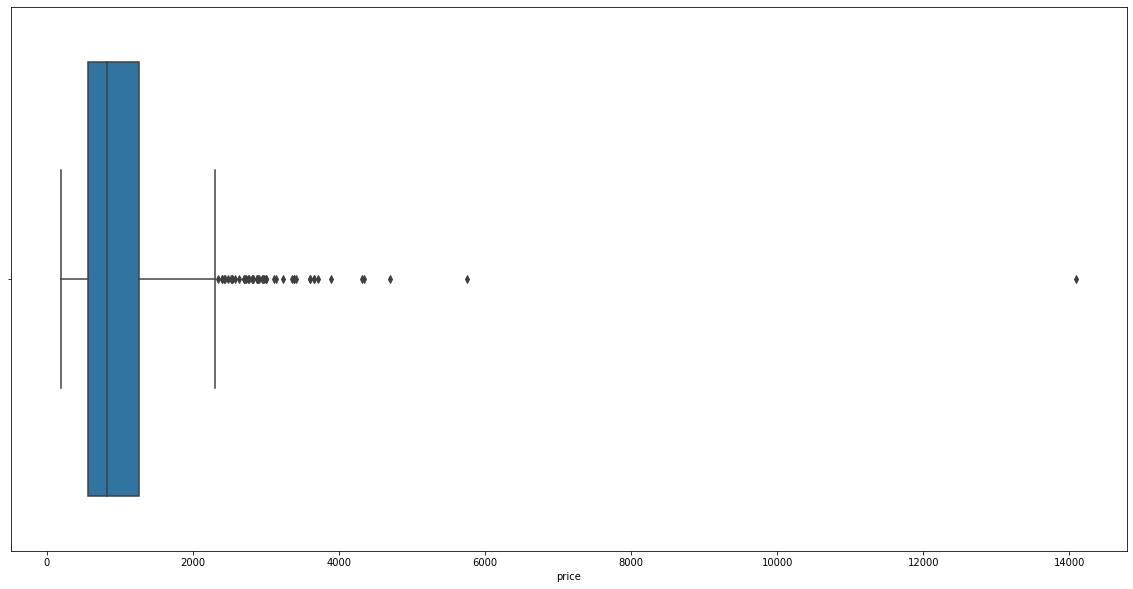

In [16]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(df_laptop['price'])

In [17]:
# Drop crazy outlier
df = df_laptop[df_laptop['price'] < 8000]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Display'}>,
        <AxesSubplot:title={'center':'In_build_sw'}>],
       [<AxesSubplot:title={'center':'has_ssd'}>,
        <AxesSubplot:title={'center':'has_hdd'}>,
        <AxesSubplot:title={'center':'storage_size'}>],
       [<AxesSubplot:title={'center':'ram_size'}>,
        <AxesSubplot:title={'center':'warranty_length'}>, <AxesSubplot:>]],
      dtype=object)

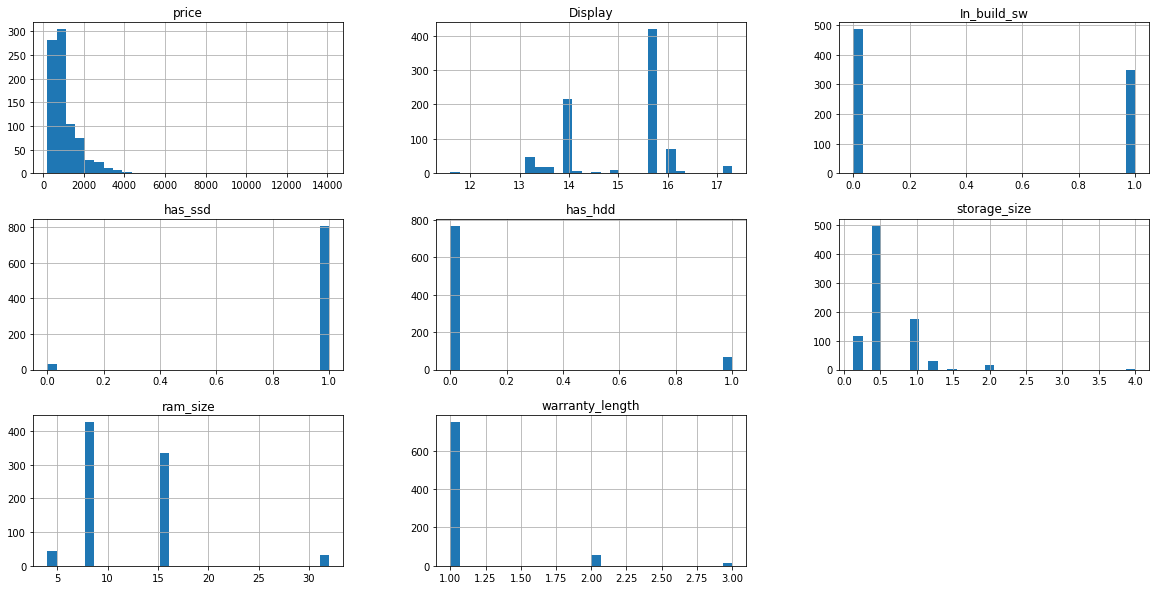

In [18]:
df_laptop.hist(bins=30, figsize=(20,10))

In [19]:
# Set price as last col
price =  df_laptop.price
df = df_laptop.drop(['price'], axis=1)
df_laptop['price'] = price

In [20]:
# Encode Cat columns and heatmap
cat_cols = ['OS', 'make', 'processor_brand','Processor', 'intel_gen', 'intel_series',
       'amd_series', 'ram_type']
encoded_df = pd.get_dummies(df_laptop, columns=cat_cols)

In [21]:
# Create correlation visualization
mat = encoded_df.corr('pearson')
data_corr = mat[['price']].sort_values(by='price', ascending=False)[:30]

Text(0.5, 1.0, 'Features Correlating with Sales Price')

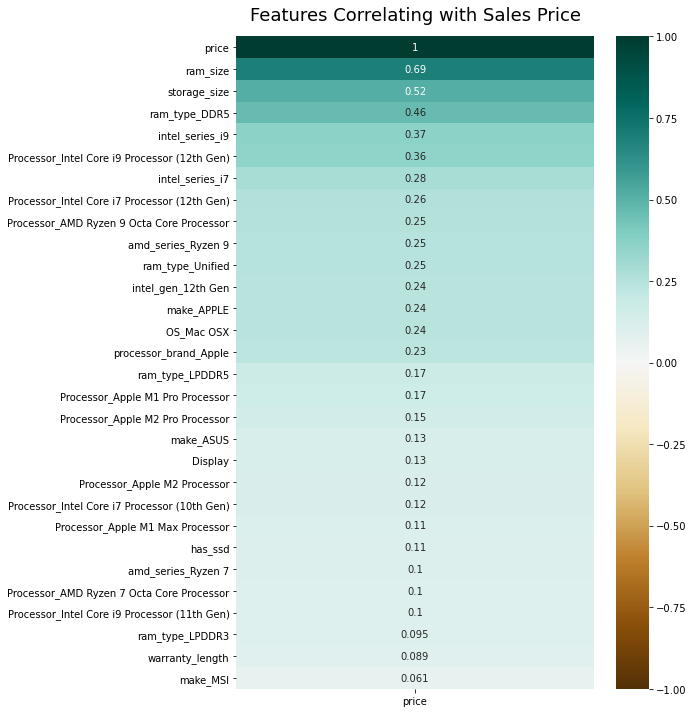

In [22]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)

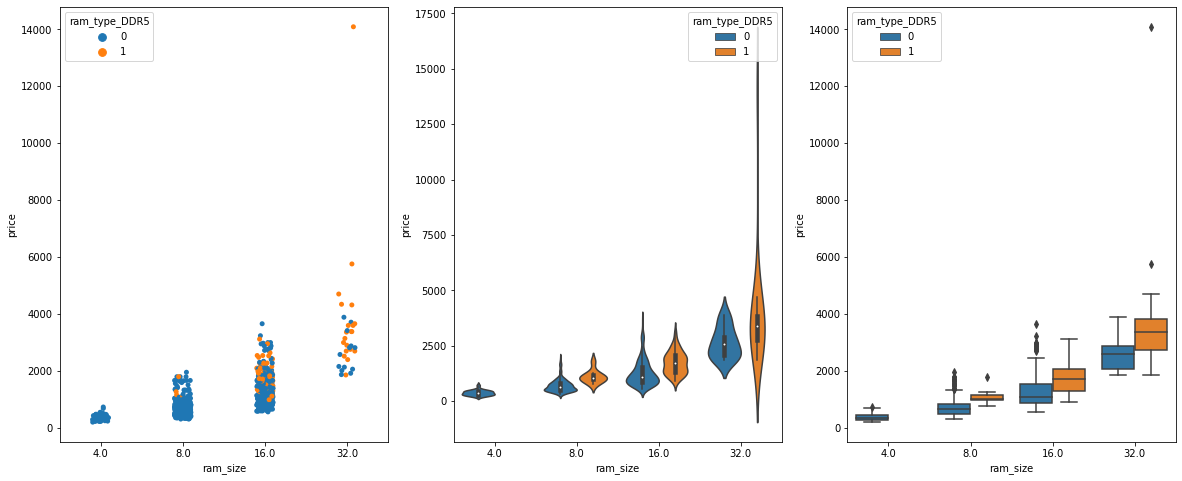

In [23]:
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=encoded_df, x = 'ram_size', y='price', ax = ax[0], hue='ram_type_DDR5')
sns.violinplot(data=encoded_df, x = 'ram_size', y='price', ax = ax[1],hue='ram_type_DDR5')
sns.boxplot(data=encoded_df, x = 'ram_size', y='price', ax = ax[2],hue='ram_type_DDR5')
plt.show()

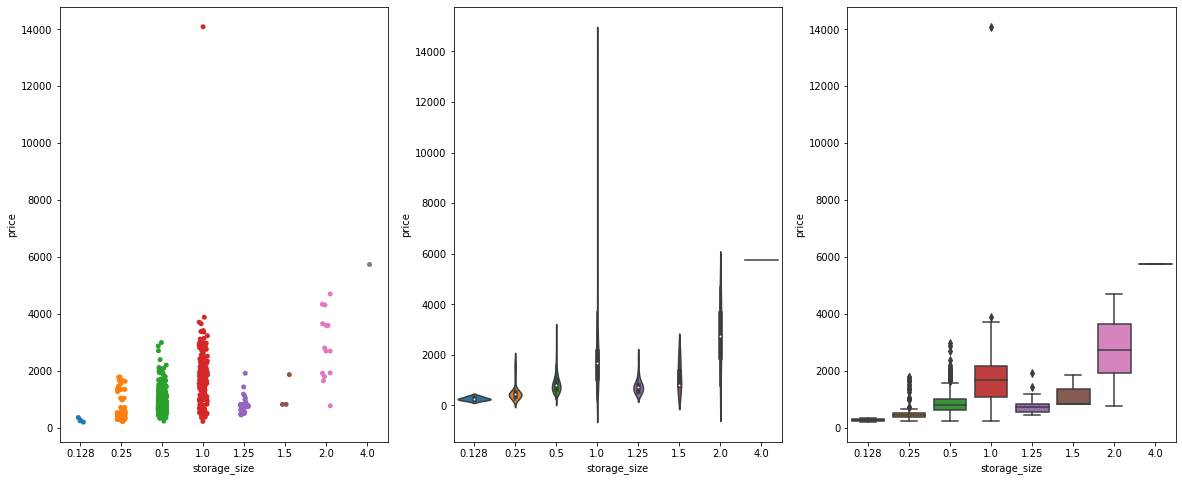

In [24]:
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=encoded_df, x = 'storage_size', y='price', ax = ax[0])
sns.violinplot(data=encoded_df, x = 'storage_size', y='price', ax = ax[1])
sns.boxplot(data=encoded_df, x = 'storage_size', y='price', ax = ax[2])
plt.show()


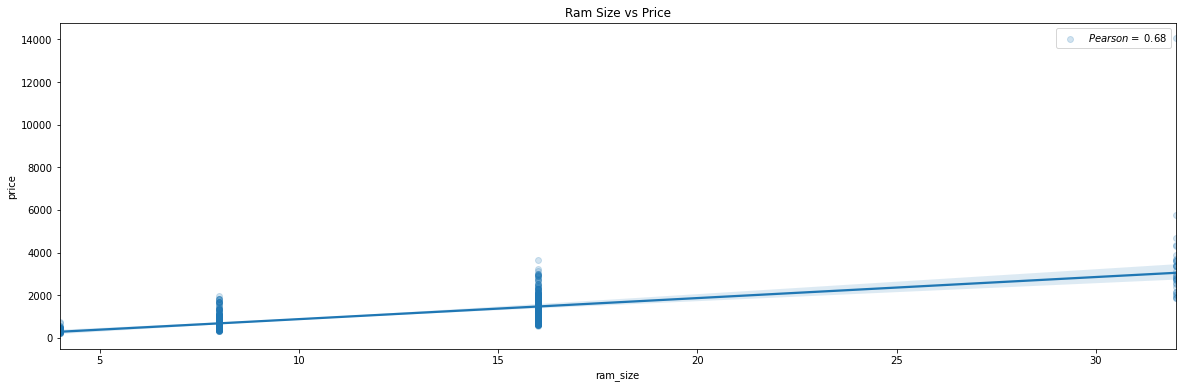

In [25]:
ram_size = 0.68

plt.figure(figsize = (20,6))
sns.regplot(data=encoded_df, x = 'ram_size', y='price', scatter_kws={'alpha':0.2})
plt.title('Ram Size vs Price', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(ram_size)], loc = 'best')
plt.show()

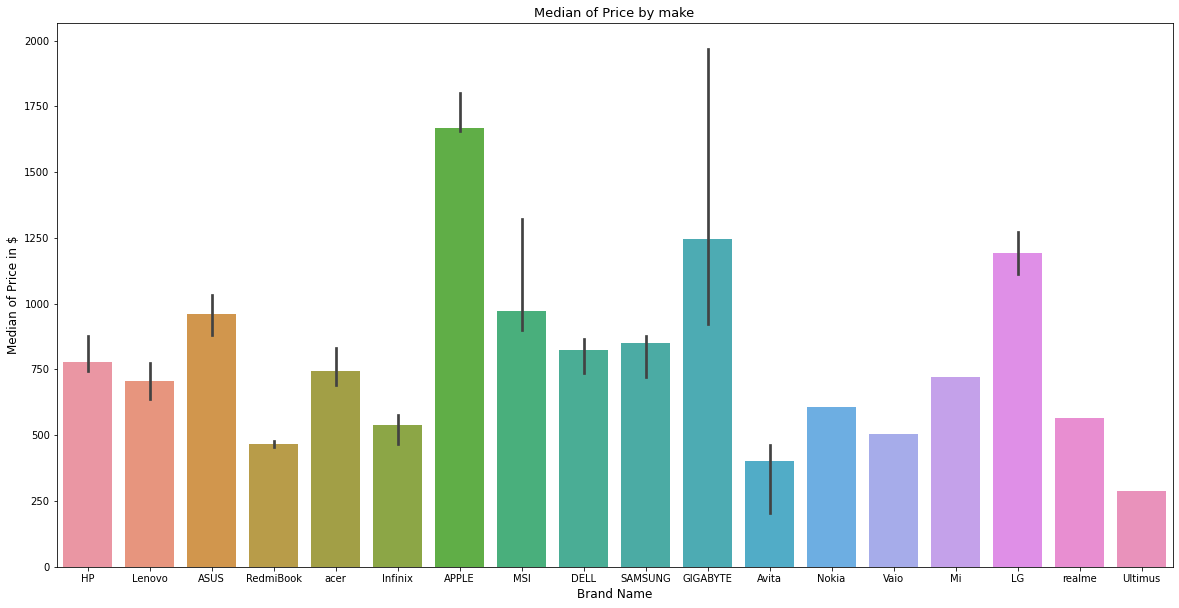

In [26]:
plt.figure(figsize = (20,10))
sns.barplot(x='make', y="price", data = df_laptop, estimator = np.median)
plt.title('Median of Price by make', fontsize = 13)
plt.xlabel('Brand Name', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

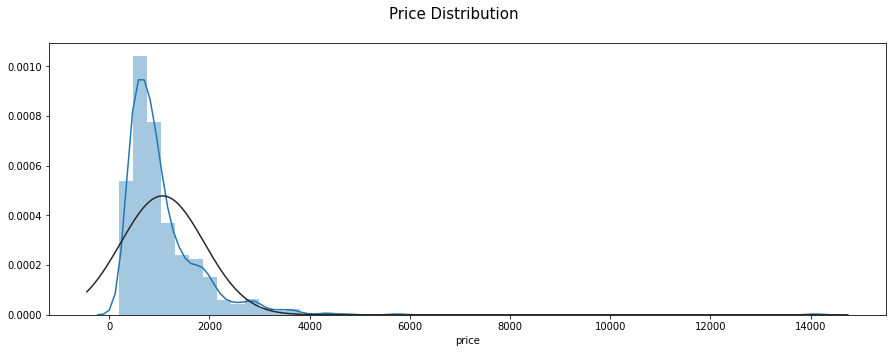

In [27]:
from scipy.stats import norm

fig= plt.figure(figsize= (15,5))
fig.suptitle("Price Distribution", fontsize= 15)

# sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])




sns.distplot(price, kde = True, hist=True, fit = norm)
plt.show()

In [28]:
encoded_df = encoded_df.drop(['price'], axis=1)
encoded_df['price'] = price

# Modelbuilding

In [34]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split


model_names = encoded_df['title']
encoded_df = encoded_df.drop(['title'], axis=1)

In [37]:
X = encoded_df.iloc[:,:-1]
#X = X.astype(np.float32)
y = encoded_df.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=2)

In [38]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:08<00:00,  4.93it/s]


In [39]:
encoded_df.head()

,Display,In_build_sw,has_ssd,has_hdd,storage_size,ram_size,warranty_length,OS_Chrome OS,OS_DOS,OS_Mac OSX,...,amd_series_Ryzen 9,ram_type_DDR3,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,ram_type_LPDDR5,ram_type_Unified,price
1,14.00,0,1.00,0.00,0.25,8.00,1.00,0,0,0,...,0,0,1,0,0,0,0,0,0,425.88
2,15.60,0,1.00,0.00,0.50,8.00,1.00,0,0,0,...,0,0,1,0,0,0,0,0,0,407.99
3,15.60,1,1.00,0.00,0.50,8.00,1.00,0,0,0,...,0,0,1,0,0,0,0,0,0,545.88
4,15.60,1,1.00,0.00,0.50,8.00,1.00,0,0,0,...,0,0,1,0,0,0,0,0,0,407.88
5,17.30,0,1.00,0.00,0.50,8.00,1.00,0,0,0,...,0,0,1,0,0,0,0,0,0,815.88


In [40]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.67,0.85,308.01,0.05
XGBRegressor,0.67,0.84,309.72,0.23
GradientBoostingRegressor,0.67,0.84,310.59,0.16
RandomForestRegressor,0.66,0.84,313.98,0.63
HuberRegressor,0.65,0.83,319.66,0.06
HistGradientBoostingRegressor,0.64,0.83,324.16,2.24
PassiveAggressiveRegressor,0.63,0.83,325.65,0.03
LGBMRegressor,0.63,0.83,325.72,0.07
LassoCV,0.63,0.83,327.89,0.24
